<a href="https://colab.research.google.com/github/nidhipriya2000/ANALYZING-HOTEL-BOOKINGS/blob/main/HOTEL_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#lets begin from the beginning
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#loading file
file_path='/content/drive/MyDrive/Copy of Hotel Bookings.csv'
hotel_df=pd.read_csv(file_path)

In [ ]:
#this is what our data looks like
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# DATA CLEANING
for data cleaning we will carry out the tasks as follows

1.   removing unnecessary columns
2.   removing null values 



In [ ]:
#step 1: viewing columns and thinking what to keep
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# after sparing some minutes finalized the following
columns_to_keep= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children','babies','meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type','agent', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [ ]:
#making a copy so that the original data remains undisturbed
hotel_df_new = hotel_df[columns_to_keep].copy()

In [ ]:
#viewing the info in a nutshell to find out how many columns have null values 
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

comes out that we have got a lot of columns to work upon so that these do not disturb at the time of EDA

In [ ]:
#here we go
hotel_df['children'].fillna(0,inplace=True)
hotel_df['children'] = hotel_df['children'].astype(int)
hotel_df['country'].fillna('N/A',inplace=True)
hotel_df['agent'].fillna('N/A',inplace=True)
hotel_df['company'].fillna('N/A',inplace=True)
hotel_df['days_in_waiting_list'].fillna('N/A',inplace=True)


In [ ]:
#just doing a double check and making sure that we are ready to proceed
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

task all done!!!!

# ANALYSIS AND VISUALIZATION FOR EDA

# 1.No of bookings (yearly and monthly)

In [ ]:
#finding out unique enteries in the column hotel
hotel_df_new.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
resort_hotel_df = hotel_df_new[hotel_df_new.hotel == "Resort Hotel"]
city_hotel_df= hotel_df_new[hotel_df_new.hotel == "City Hotel"]

In [ ]:
#no of monthly bookings
hotel_df.groupby('arrival_date_month')['arrival_date_month'].count()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

YEARLY BOOKINGS

In [ ]:
#VISUALIZATION
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


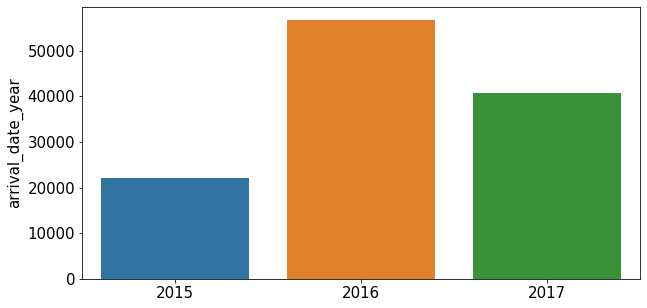

In [ ]:
counts = hotel_df_new['arrival_date_year'].value_counts()
sns.barplot(counts.index, counts)

YEARLY BOOKINGS MADE IN CITY/RESORT HOTELS INDIVIDUALLY

Text(0.5, 1.0, 'yearly_bookings')

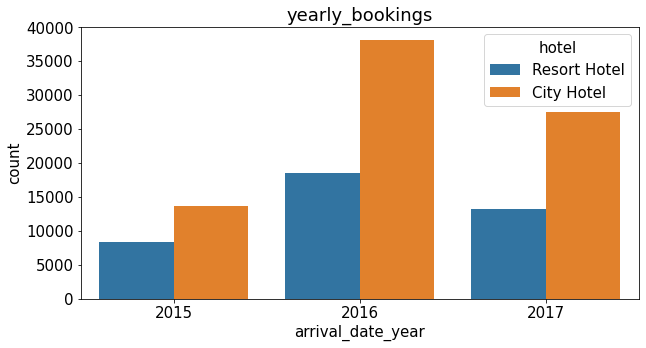

In [ ]:
sns.countplot (x= 'arrival_date_year', data=hotel_df_new , hue= 'hotel').set_title ('yearly_bookings')

MONTHLY BOOKINGS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


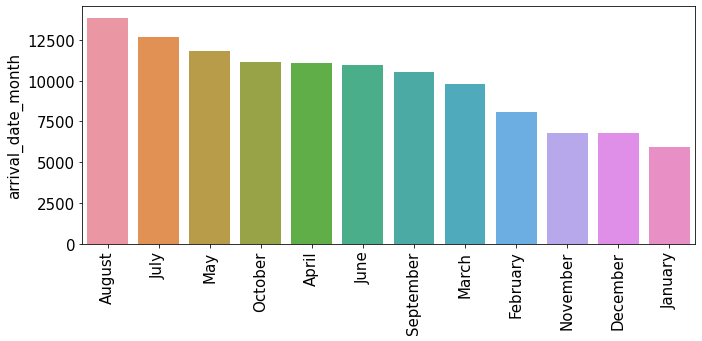

In [ ]:
counts = hotel_df_new['arrival_date_month'].value_counts()
sns.barplot(counts.index, counts)
plt.xticks(rotation=90)
plt.tight_layout()

# 2. NUMBER OF BOOKINGS MADE BY INDIVIDUALS FROM DIFFERENT COUNTRIES 

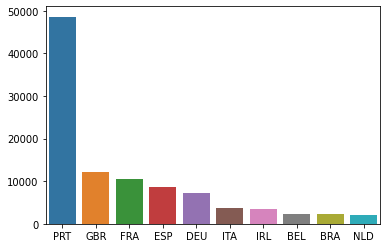

In [ ]:
sns.barplot(y= list(hotel_df_new.country.value_counts().head(10)), x= list(hotel_df.country.value_counts().head(10).index))

COUNTRY WISE BOOKINGS WITH EXACT NUMBERS

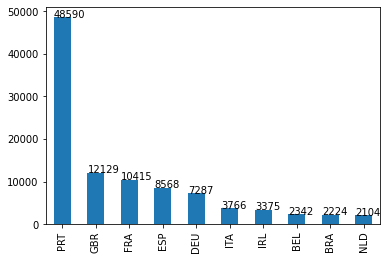

In [ ]:
ax= hotel_df_new.country.value_counts().head(10).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

In [ ]:
#people from Portugal made the highest number of bookings whereas people from netherlands made least bookings

# 3. studing relationship between stays in week nights against sats in weekend nights

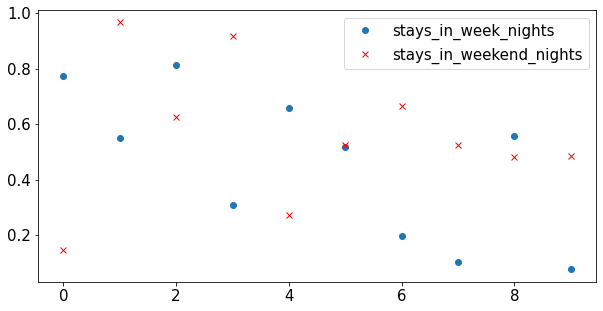

In [ ]:
d = {'stays_in_week_nights' : np.random.rand(10),
     'stays_in_weekend_nights' : np.random.rand(10)}

hotel_df = pd.DataFrame(d)

hotel_df.plot(style=['o','rx'])

In [ ]:
#majority of the times people prefer a weekend night to book hotel

# 4. Studying pattern of cancellations

In [ ]:
#finding out the mean
hotel_df_new.is_canceled.mean()

0.37041628277075134

In [ ]:
#mean individually for city/resort hotels
hotel_df_new.groupby("hotel")['is_canceled'].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

In [ ]:
#no of cancellations WRT no of times booking has been cancelled
hotel_df_new.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
hotel_df_new.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,112906,112906,112906,112906,112906,112906,112906,112906,112906,112906,...,112906,112906,112906,112906,112906,112906,112906,112906,112906,112906
1,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,...,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051
2,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
3,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
4,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
5,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
6,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
11,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
13,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


plotting no of previous cancellations against the number of cancellations

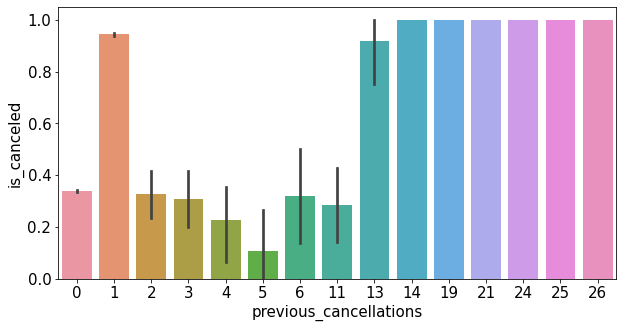

In [ ]:
#how frequent are the previous cancelers in this cancelling game
sns.barplot(x= "previous_cancellations" ,y = "is_canceled", data = hotel_df_new)


Relationship between lead time and cancellations

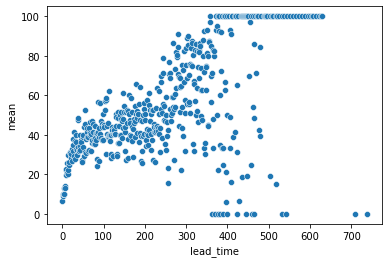

In [ ]:
a = hotel_df_new.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

clearly lead time is directly proportional to cancellations

RELATIONSHIP BETWEEN MARKET SEGMENTS AND CANCELLATIONS

Text(0.5, 1.0, 'Relationship between booking cancellations & market segment')

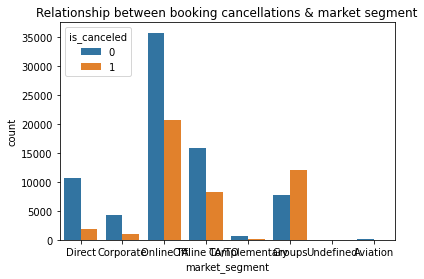

In [ ]:
sns.countplot(x='market_segment',data=hotel_df_new ,hue='is_canceled')
plt.title("Relationship between booking cancellations & market segment")

RELATIONSHIP BETWEEN DEPOSIT TYPES AND CANCELLATIONS

Text(0.5, 1.0, 'Relationship between deposit types and cancellation')

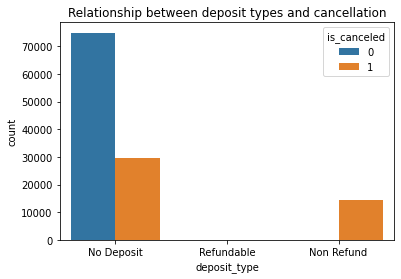

In [ ]:
sns.countplot(x='deposit_type',data=hotel_df_new ,hue='is_canceled')
plt.title("Relationship between deposit types and cancellation")

Text(0.5, 1.0, 'Relationship between market segment and cancellations')

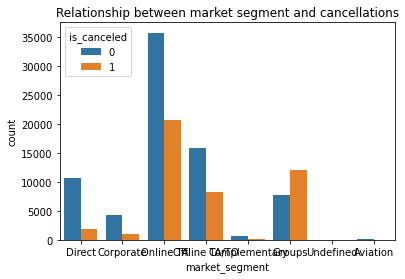

In [ ]:
sns.countplot(x='market_segment',data=hotel_df_new ,hue='is_canceled')
plt.title("Relationship between market segment and cancellations")

5. AVERAGE DAILY RATES AND VARYING PRICES 

In [ ]:
hotel_df_new['total_visitors'] = hotel_df_new['adults'] + hotel_df_new['children'] + hotel_df_new['babies']

In [ ]:
hotel_df_new['adr_pp']= hotel_df_new.adr/hotel_df_new.total_visitors

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


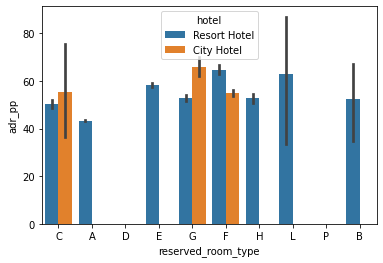

In [ ]:
# plotting variation in adr with room type

sns.barplot(data = hotel_df_new, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


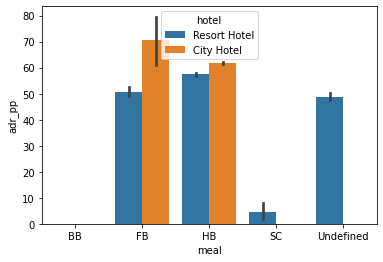

In [ ]:
# plotting variation in adr with meal type

sns.barplot(data = hotel_df_new, x = 'meal', y = 'adr_pp', hue = 'hotel')


In [ ]:
month_adr_df= hotel_df_new.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
month_adr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],month_adr_df.index)), "month": list(map(lambda x:x[1],month_adr_df.index)), "mean": month_adr_df.values})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

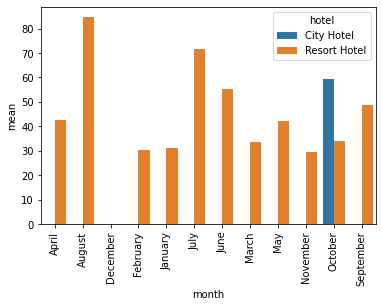

In [ ]:

sns.barplot (y= 'mean', x= 'month', data= month_adr_df, hue= 'hotel')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


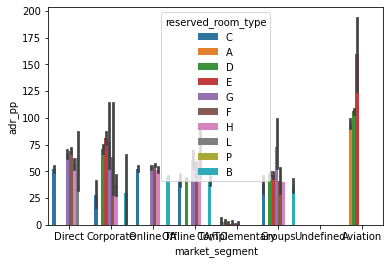

In [ ]:
sns.barplot(x= 'market_segment', y= 'adr_pp', hue= 'reserved_room_type', data= hotel_df_new)

# CONCLUSION


*   year 2016 has most no of bookings
*   city hotels are comparitively cheaper and more preferred as compared to resort hotels
*  summers are most preferred by the people to make a booking
*  Portugal sends most number of visitors in different hotels
*  weekkdays and weekends dont have much to do with bookings
*  people who have made a cancellation previously are much likely to cancel their bookings 
*  lead time is directly proportional to no of cancellations
*  online bookings and the bookings with refundable deposit type has the most chances of cancellation.
*  in spring and autumn seasons dont have much to do with the varying prices.



